In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx


In [10]:
rua_e_bairro = pd.read_csv('./data/final/Rua e bairro.csv', sep=';')
lixo_e_limpeza = pd.read_csv('./data/final/Lixo e limpeza.csv', sep=';')
animais = pd.read_csv('./data/final/Animais.csv', sep=';')
cidadania = pd.read_csv('./data/final/Cidadania e assistência social.csv', sep=';')

/tmp/ipykernel_68037/1792034181.py:2: DtypeWarning:

Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_68037/1792034181.py:3: DtypeWarning:

Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_68037/1792034181.py:4: DtypeWarning:

Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.



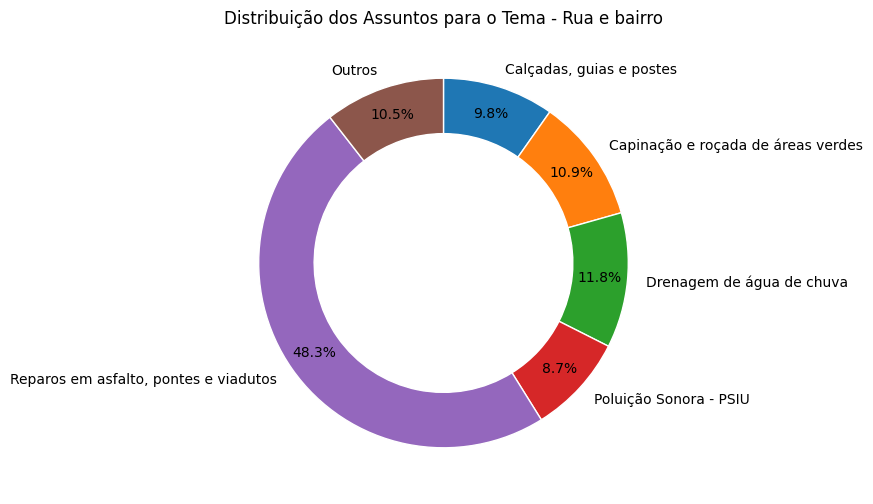

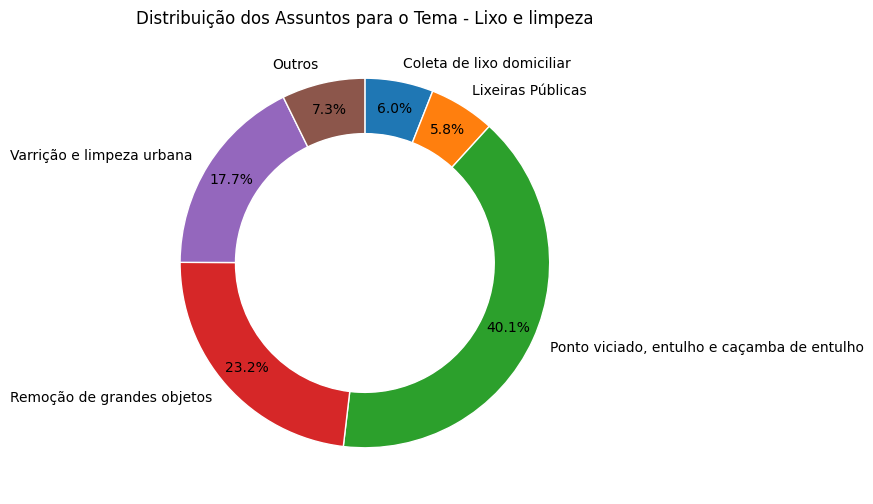

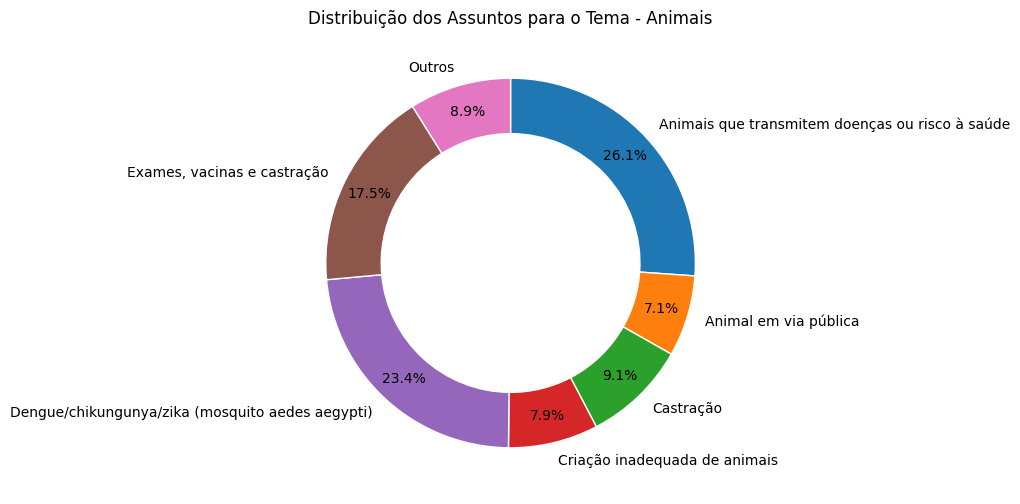

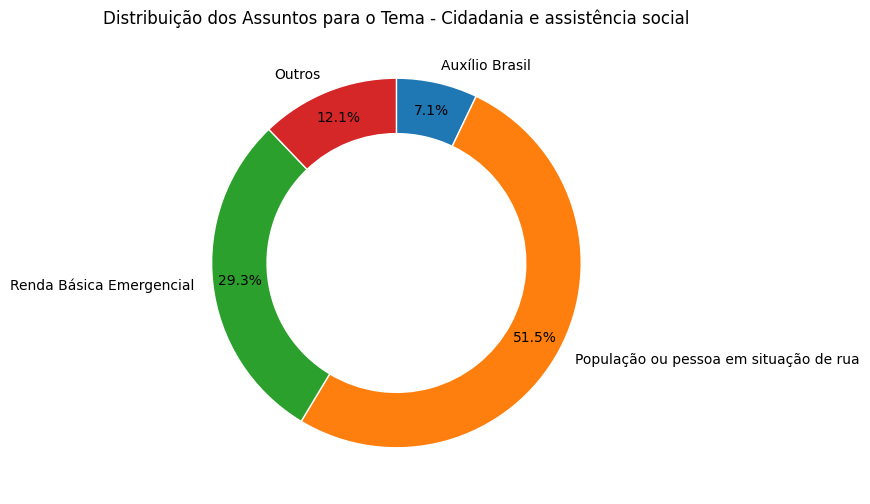

In [12]:
plot_donut_chart(rua_e_bairro, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(lixo_e_limpeza, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(animais, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(cidadania, 'Distribuição dos Assuntos para o Tema')

In [ ]:
# plot_bar_chart_by_year_per_assunto(lixo_e_limpeza, "Lixo e Limpeza")

# Motivo para o pico de solicitações em 2023 por ponto viciado: https://capital.sp.gov.br/web/lapa/w/noticias/127394

# plot_bar_chart_by_year_per_assunto(rua_e_bairro, "Rua e Bairro")
plot_bar_chart_by_year_per_assunto(animais, "Rua e Bairro")


In [ ]:
import plotly.express as px

filtered = rua_e_bairro.dropna(subset=['latitude', 'longitude'])

filtered['mes'] = pd.to_datetime(filtered['data de abertura']).dt.to_period('M')

mapa = filtered.groupby(['latitude', 'longitude', 'mes']).size().reset_index(name='intensidade')
mapa = mapa.sort_values(by='mes')

mapa

In [ ]:

# Criar o mapa de calor

fig = px.density_mapbox(mapa, lat='latitude', lon='longitude', z='intensidade', 
                        animation_frame=mapa['mes'].astype(str),
                        height=700,
                        width=1000,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")


# Ajustar o layout do mapa e a barra de cor (colorbar)
fig.update_layout(
    mapbox_style="carto-positron", 
    mapbox_zoom=3, 
    mapbox_center={"lat": -23.508145, "lon": -46.597952},
    coloraxis=dict(cmin=0, cmax=500)  # Definir a escala fixa para a barra de cor
)



# Mostrar o gráfico
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, columns):
    """
    Remove outliers de um DataFrame usando o método do Interquartile Range (IQR).
    
    Parâmetros:
    - df: DataFrame original.
    - columns: Lista de colunas onde remover os outliers.
    
    Retorna:
    - DataFrame sem os outliers nas colunas especificadas.
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def plot_assunto_by_lat_lon(df, title):
    """
    Gera um gráfico cartesiano plotando 'assunto' por 'latitude' e 'longitude',
    removendo outliers das colunas de latitude e longitude.
    
    Parâmetros:
    - df: DataFrame contendo as colunas 'latitude', 'longitude', e 'assunto'.
    - title: Título do gráfico.
    """
    
    # Remover outliers
    df_filtered = remove_outliers_iqr(df, ['latitude', 'longitude'])

    # Filtrando dados para garantir que não existam valores nulos em latitude e longitude
    df_filtered = df_filtered.dropna(subset=['latitude', 'longitude'])

    # Criando o gráfico cartesiano
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_filtered,
        x='longitude',
        y='latitude',
        hue='assunto',
        palette='muted',
        s=100,  # Tamanho dos pontos
        edgecolor='w',
        alpha=0.7
    )

    # Personalizando o gráfico
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Assunto', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [ ]:
plot_assunto_by_lat_lon(lixo_e_limpeza, 'teste')